In [1]:
# Import some basic libraries

In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading our dataset 

In [131]:
df = pd.read_csv('weatherAUS.csv')

In [132]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


So we have total 8425 rows × 23 columns 

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [134]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We have null values in almost all the columns and the quantity is significantly more

In [3]:
# Dropping the null rows from our target column

In [135]:
df.dropna(subset=['Rainfall'], inplace=True)

In [136]:
df.Sunshine.value_counts()

Sunshine
0.0     160
11.1     68
11.2     67
11.0     66
10.7     63
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: count, Length: 140, dtype: int64

In [137]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Date
2011-03-26    5
2011-05-18    5
2011-05-16    5
2011-05-15    5
2011-05-14    5
             ..
2013-01-23    1
2013-01-24    1
2013-01-25    1
2013-01-26    1
2014-04-05    1
Name: count, Length: 2966, dtype: int64


Location
Melbourne       1502
PerthAirport    1204
Williamtown     1154
Albury           898
Newcastle        808
CoffsHarbour     610
Brisbane         574
Penrith          479
Wollongong       466
Darwin           250
Adelaide         201
Uluru             39
Name: count, dtype: int64


MinTemp
 12.0    74
 10.8    66
 13.2    66
 13.8    66
 12.7    66
         ..
 1.4      1
-1.5      1
-1.7      1
-0.8      1
 26.0     1
Name: count, Length: 285, dtype: int64


MaxTemp
19.0    87
23.8    73
19.8    73
25.0    69
22.3    68
        ..
10.0     1
10.4     1
44.9     1
11.7     1
43.5     1
Name: count, Length: 331, dtype: int64


Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34

In [4]:
# converting our Date column into datetime format

In [138]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#creating separate columns for day,month and year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [5]:
# Dropping date column

In [139]:
df.drop('Date',axis=1,inplace=True)

In [140]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8185 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8185 non-null   object 
 1   MinTemp        8135 non-null   float64
 2   MaxTemp        8140 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4788 non-null   float64
 5   Sunshine       4305 non-null   float64
 6   WindGustDir    7218 non-null   object 
 7   WindGustSpeed  7218 non-null   float64
 8   WindDir9am     7386 non-null   object 
 9   WindDir3pm     7895 non-null   object 
 10  WindSpeed9am   8135 non-null   float64
 11  WindSpeed3pm   8096 non-null   float64
 12  Humidity9am    8147 non-null   float64
 13  Humidity3pm    8099 non-null   float64
 14  Pressure9am    6893 non-null   float64
 15  Pressure3pm    6890 non-null   float64
 16  Cloud9am       5954 non-null   float64
 17  Cloud3pm       5906 non-null   float64
 18  Temp9am      

In [142]:
# checking for duplicate columns. if present the drop this column
df1=df.T.drop_duplicates().T
print(df1)

     Location MinTemp MaxTemp Rainfall Evaporation Sunshine WindGustDir  \
0      Albury    13.4    22.9      0.6         NaN      NaN           W   
1      Albury     7.4    25.1      0.0         NaN      NaN         WNW   
2      Albury    12.9    25.7      0.0         NaN      NaN         WSW   
3      Albury     9.2    28.0      0.0         NaN      NaN          NE   
4      Albury    17.5    32.3      1.0         NaN      NaN           W   
...       ...     ...     ...      ...         ...      ...         ...   
8420    Uluru     2.8    23.4      0.0         NaN      NaN           E   
8421    Uluru     3.6    25.3      0.0         NaN      NaN         NNW   
8422    Uluru     5.4    26.9      0.0         NaN      NaN           N   
8423    Uluru     7.8    27.0      0.0         NaN      NaN          SE   
8424    Uluru    14.9     NaN      0.0         NaN      NaN         NaN   

     WindGustSpeed WindDir9am WindDir3pm  ... Pressure3pm Cloud9am Cloud3pm  \
0             44.0  

In [143]:
# Dropping all the duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
# for the categorical column filling all the null values with the mode by using simple imputer 

In [144]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = imputer.fit_transform(df[i].values.reshape(-1, 1))[:, 0]


In [145]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [146]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [147]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [148]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1.0,13.4,22.9,0.6,NaN,NaN,13.0,44.0,13.0,14.0,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,0.0,NaN,NaN,14.0,44.0,6.0,15.0,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,0.0,NaN,NaN,15.0,46.0,13.0,15.0,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,0.0,NaN,NaN,4.0,24.0,9.0,0.0,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.0,NaN,NaN,13.0,41.0,1.0,7.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.4,0.0,NaN,NaN,0.0,31.0,9.0,1.0,...,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,21,6,2017
8421,9.0,3.6,25.3,0.0,NaN,NaN,6.0,22.0,9.0,3.0,...,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,22,6,2017
8422,9.0,5.4,26.9,0.0,NaN,NaN,3.0,37.0,9.0,14.0,...,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,23,6,2017
8423,9.0,7.8,27.0,0.0,NaN,NaN,9.0,28.0,10.0,3.0,...,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,24,6,2017


In [7]:
# Now for the rest numeric columns i am using knn imputer to fill the null values

In [149]:
from sklearn.impute import KNNImputer
ncols = df.select_dtypes(include=[np.number])
KNNI = KNNImputer(n_neighbors=7)
df_new = KNNI.fit_transform(ncols)
df_new = pd.DataFrame(df_new, columns=ncols.columns)

In [150]:
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1.0,13.4,22.900000,0.6,4.085714,7.785714,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,3.571429,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,0.0,5.771429,10.228571,14.0,44.000000,6.0,15.0,...,1007.8,1.714286,3.000000,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,0.0,6.257143,10.585714,15.0,46.000000,13.0,15.0,...,1008.7,2.714286,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,0.0,5.114286,10.114286,4.0,24.000000,9.0,0.0,...,1012.8,0.571429,1.714286,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.0,6.685714,8.028571,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9.0,2.8,23.400000,0.0,2.028571,9.442857,0.0,31.000000,9.0,1.0,...,1020.3,2.857143,1.714286,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6620,9.0,3.6,25.300000,0.0,3.200000,9.300000,6.0,22.000000,9.0,3.0,...,1019.1,1.000000,0.571429,10.9,24.5,0.0,0.0,22.0,6.0,2017.0
6621,9.0,5.4,26.900000,0.0,3.857143,9.785714,3.0,37.000000,9.0,14.0,...,1016.8,2.428571,2.571429,12.5,26.1,0.0,0.0,23.0,6.0,2017.0
6622,9.0,7.8,27.000000,0.0,3.714286,9.871429,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24.0,6.0,2017.0


In [151]:
df_new.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

Now we can see that we dont have any null values 

In [152]:
df=df_new

In [153]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1.0,13.4,22.900000,0.6,4.085714,7.785714,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,3.571429,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,0.0,5.771429,10.228571,14.0,44.000000,6.0,15.0,...,1007.8,1.714286,3.000000,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,0.0,6.257143,10.585714,15.0,46.000000,13.0,15.0,...,1008.7,2.714286,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,0.0,5.114286,10.114286,4.0,24.000000,9.0,0.0,...,1012.8,0.571429,1.714286,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.0,6.685714,8.028571,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9.0,2.8,23.400000,0.0,2.028571,9.442857,0.0,31.000000,9.0,1.0,...,1020.3,2.857143,1.714286,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6620,9.0,3.6,25.300000,0.0,3.200000,9.300000,6.0,22.000000,9.0,3.0,...,1019.1,1.000000,0.571429,10.9,24.5,0.0,0.0,22.0,6.0,2017.0
6621,9.0,5.4,26.900000,0.0,3.857143,9.785714,3.0,37.000000,9.0,14.0,...,1016.8,2.428571,2.571429,12.5,26.1,0.0,0.0,23.0,6.0,2017.0
6622,9.0,7.8,27.000000,0.0,3.714286,9.871429,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24.0,6.0,2017.0


In [154]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,...,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,5.306159,13.075979,24.099400,2.780148,4.871700,7.622794,6.590731,37.911749,7.007397,7.838315,...,1015.485402,4.116524,4.155517,17.888826,22.685992,0.237319,0.231733,15.759662,6.432216,2012.038647
std,3.099466,5.573975,6.133898,10.591418,3.827620,3.435836,5.234058,14.232217,4.551393,4.489083,...,6.246790,2.672603,2.491623,5.736921,5.986675,0.425471,0.421971,8.795574,3.358574,2.297255
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.000000,9.000000,19.600000,0.000000,2.600000,5.228571,1.000000,28.000000,3.000000,4.000000,...,1011.200000,1.571429,2.000000,13.800000,18.300000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,6.000000,13.142857,23.500000,0.000000,4.057143,8.400000,7.000000,35.000000,7.000000,9.000000,...,1015.600000,4.000000,4.000000,17.900000,22.100000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,8.000000,17.500000,28.400000,0.800000,6.400000,10.300000,12.000000,46.000000,11.000000,12.000000,...,1019.757143,7.000000,7.000000,22.200000,26.800000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


So from the statistical summary we can see that 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'RainTomorrow' these columns has skewness present. because there is a significant difference between mean and the mode.

And also we can see that evaporation,rainfall and pressure at 9pm column has outliers present because there is a difference between the 75th percentile and the max values 

In [8]:
# Checking for the skewness 

In [155]:
df.skew()

Location          0.001236
MinTemp          -0.073860
MaxTemp           0.326610
Rainfall         13.510350
Evaporation       9.835621
Sunshine         -0.547125
WindGustDir       0.111949
WindGustSpeed     0.787113
WindDir9am        0.217796
WindDir3pm       -0.117986
WindSpeed9am      0.964794
WindSpeed3pm      0.561554
Humidity9am      -0.256324
Humidity3pm       0.149264
Pressure9am      -0.086934
Pressure3pm      -0.037218
Cloud9am         -0.010014
Cloud3pm          0.013330
Temp9am          -0.045427
Temp3pm           0.353446
RainToday         1.235150
RainTomorrow      1.271878
day               0.003288
month             0.025191
year              0.357834
dtype: float64

'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'RainTomorrow' these column has the skewness present

In [9]:
# Separating skewed column and normal column

In [156]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() >0.5) or (df[i].skew() <-0.5) :
        skewed_col.append(i)
    else:
        normal_col.append(i)

print('skewed_cols are :',skewed_col)
print('\n')
print("Normal cols are :",normal_col)

skewed_cols are : ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'RainTomorrow']


Normal cols are : ['Location', 'MinTemp', 'MaxTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'day', 'month', 'year']


In [10]:
# Removing skewness by cuberoot technique

In [157]:
for i in skewed_col:
    df[i] = np.cbrt(df[i])

In [158]:
df.skew()

Location         0.001236
MinTemp         -0.073860
MaxTemp          0.326610
Rainfall         1.759072
Evaporation      0.478406
Sunshine        -1.985278
WindGustDir      0.111949
WindGustSpeed    0.104510
WindDir9am       0.217796
WindDir3pm      -0.117986
WindSpeed9am    -1.090188
WindSpeed3pm    -1.622812
Humidity9am     -0.256324
Humidity3pm      0.149264
Pressure9am     -0.086934
Pressure3pm     -0.037218
Cloud9am        -0.010014
Cloud3pm         0.013330
Temp9am         -0.045427
Temp3pm          0.353446
RainToday        1.235150
RainTomorrow     1.271878
day              0.003288
month            0.025191
year             0.357834
dtype: float64

Now we can see that skewness is almost removed

In [11]:
# Plotting distplot to see the distribution of all the columns 

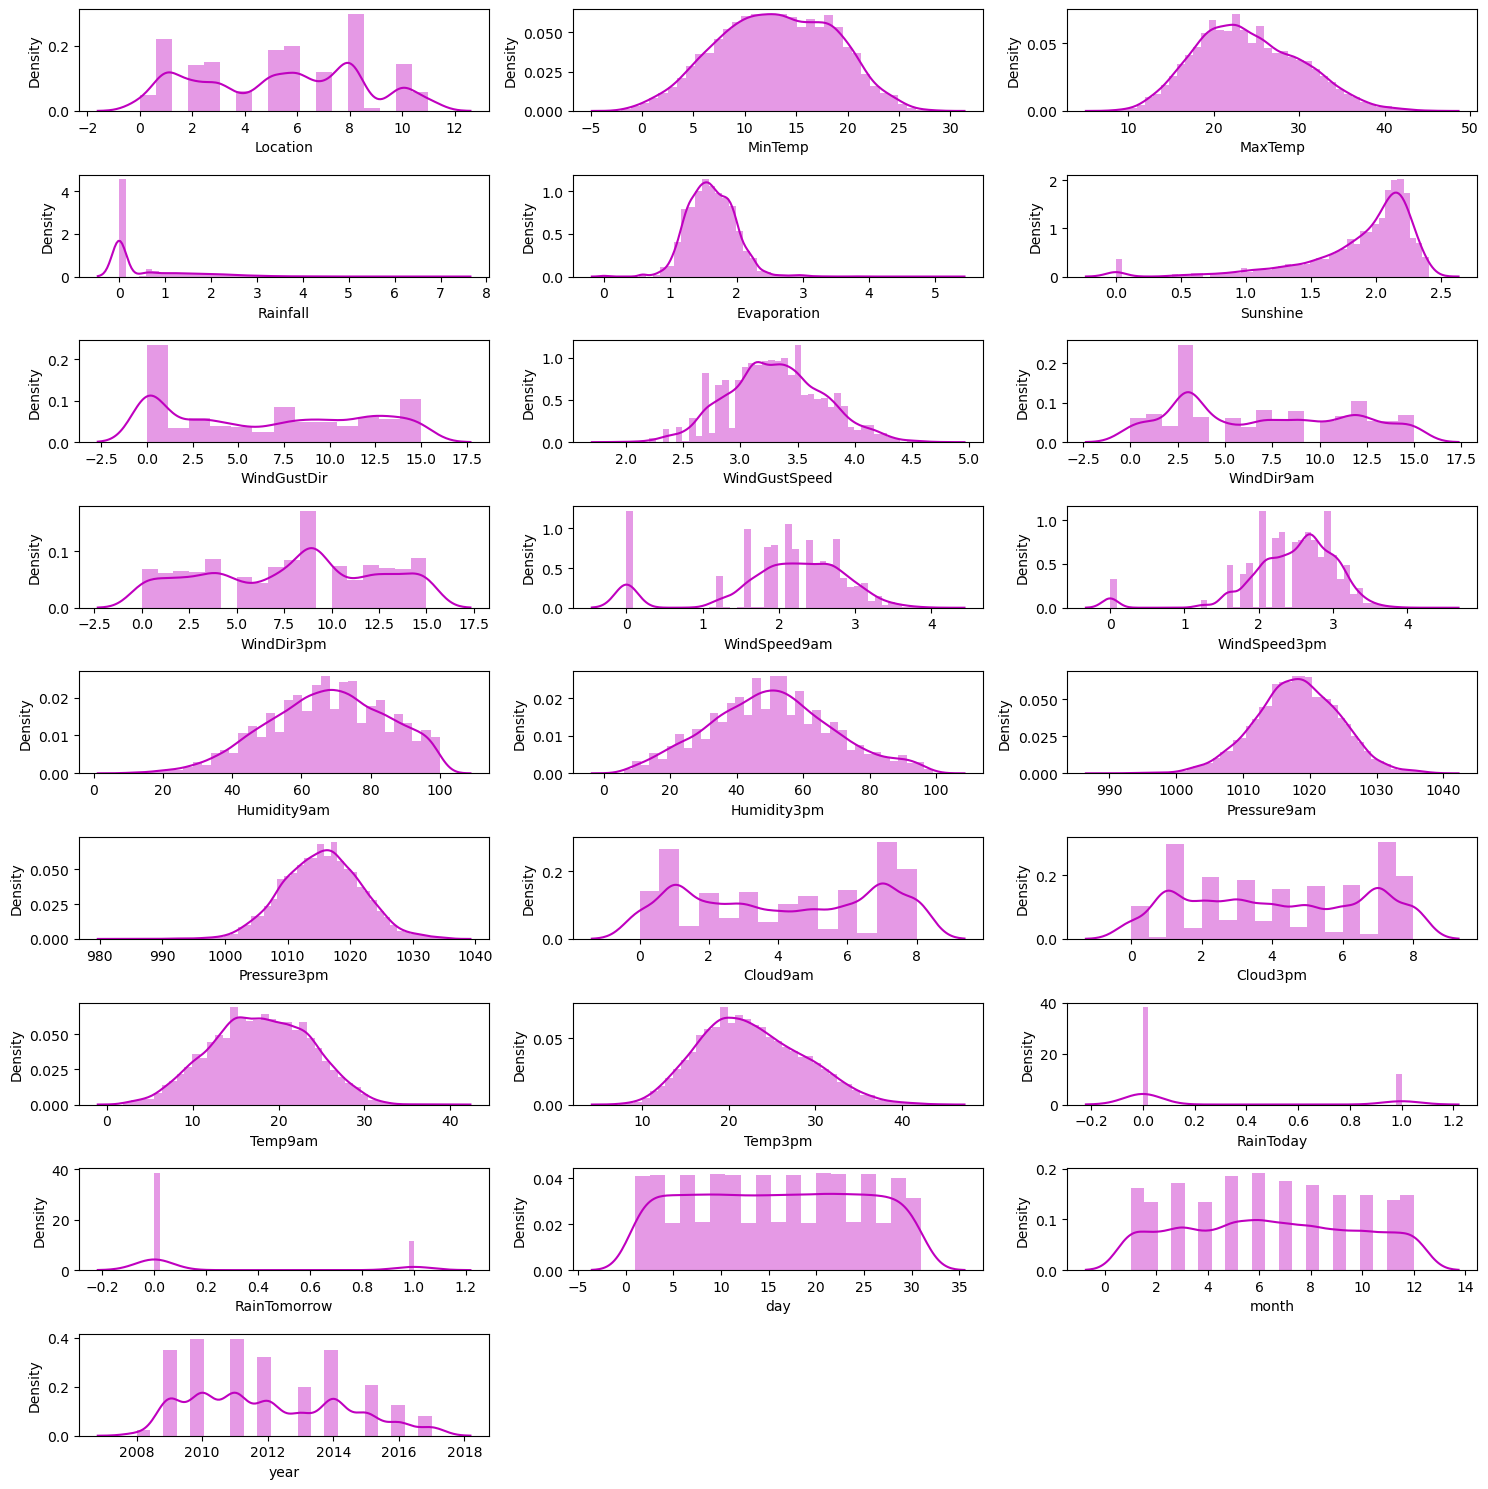

In [159]:
plt.figure(figsize=(15,15),facecolor='white')
p=1
for i in df.columns:
    if p<=26:
        ax=plt.subplot(9,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

Rainfall,evaporation and sunshine column has little bit skewness present 

## Bivariate Analysis

In [12]:
# plotting scatterplot to check the relationships between two columns 

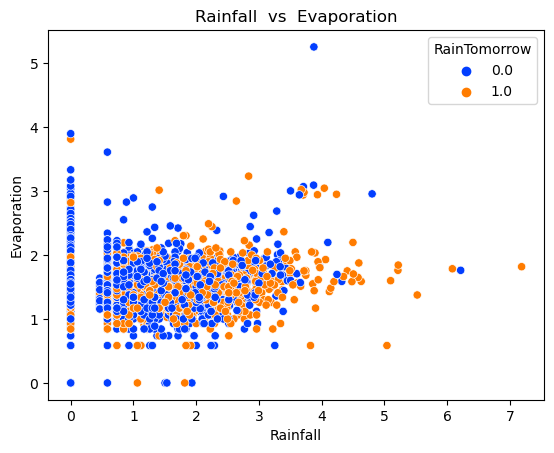

In [160]:
plt.title('Rainfall  vs  Evaporation')
sns.scatterplot(x='Rainfall',y='Evaporation',data= df ,hue='RainTomorrow',palette= "bright" )
plt.show()

It doesnot have good relation between these columns

In [161]:
df.Rainfall.value_counts()

Rainfall
0.000000    4334
0.584804     321
0.736806     144
0.843433      87
1.062659      69
            ... 
4.194551       1
2.876464       1
3.940795       1
5.039684       1
3.419952       1
Name: count, Length: 250, dtype: int64

So our target variable has lots of values i mean around 50% are 0. thats mean there is no rainfall at that day

In [162]:
df.RainTomorrow.value_counts()

RainTomorrow
0.0    5089
1.0    1535
Name: count, dtype: int64

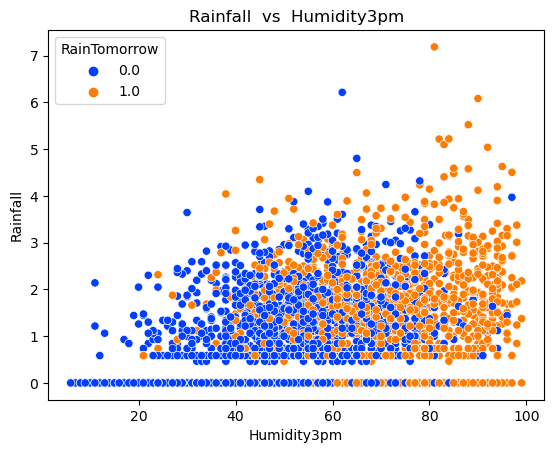

In [163]:
plt.title('Rainfall  vs  Humidity3pm')
sns.scatterplot(y='Rainfall',x='Humidity3pm',data= df ,hue='RainTomorrow',palette= "bright" )
plt.show()

As humidity3pm increases there are high chances that rain will fall tomorrow 

In [13]:
# Plotting scatterplot for all the columns with the rainfall column

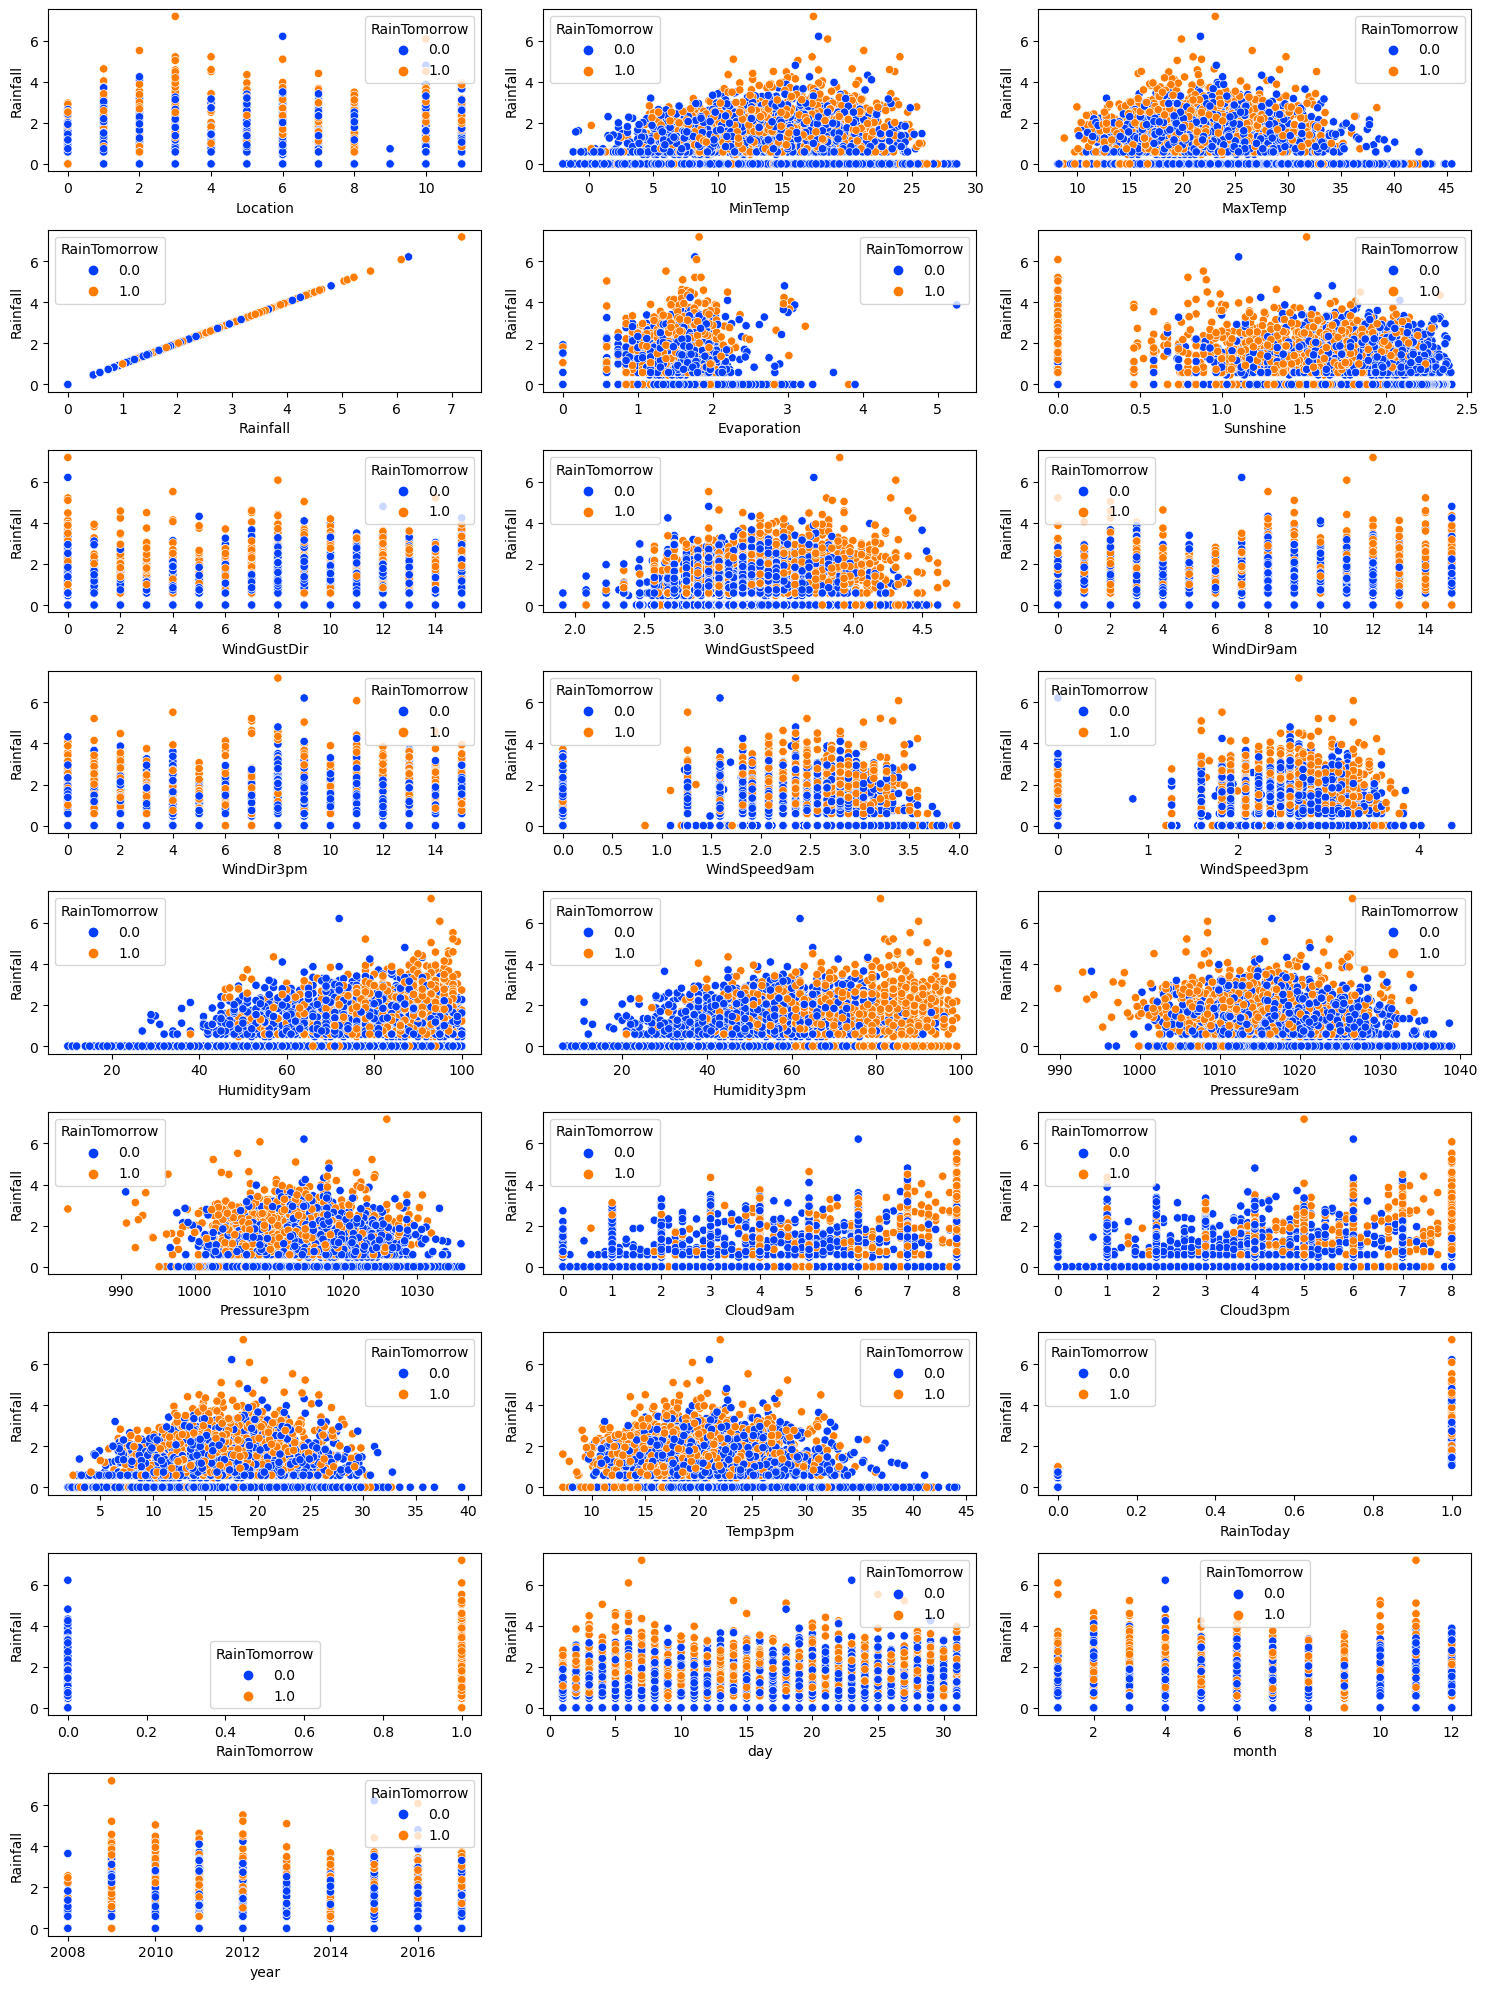

In [164]:
plt.figure(figsize=(15,20),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=25:
        ax=plt.subplot(9,3,plotnum)
        sns.scatterplot(x=i,y='Rainfall',data= df ,hue='RainTomorrow',palette= "bright")
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

So when the sunshine increases there are less chance to happen rain for tomorrow
basically we can see RainToday,
Humidity9a,
Humidity3,8
Cloud,46
RainTomo and 040
Cloucolumns has good relation with the rainfall column.
Apart from that there are very less correlation with all the columns d3pm 


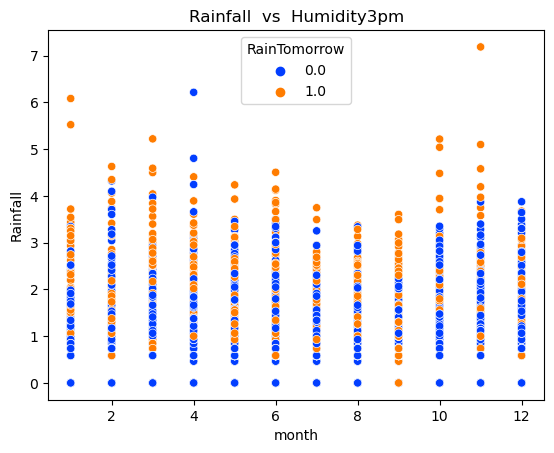

In [165]:
plt.title('Rainfall  vs  Humidity3pm')
sns.scatterplot(y='Rainfall',x='month',data= df ,hue='RainTomorrow',palette= "bright" )
plt.show()

In [14]:
# Plotting regplot to check the linear relationship between all the columns

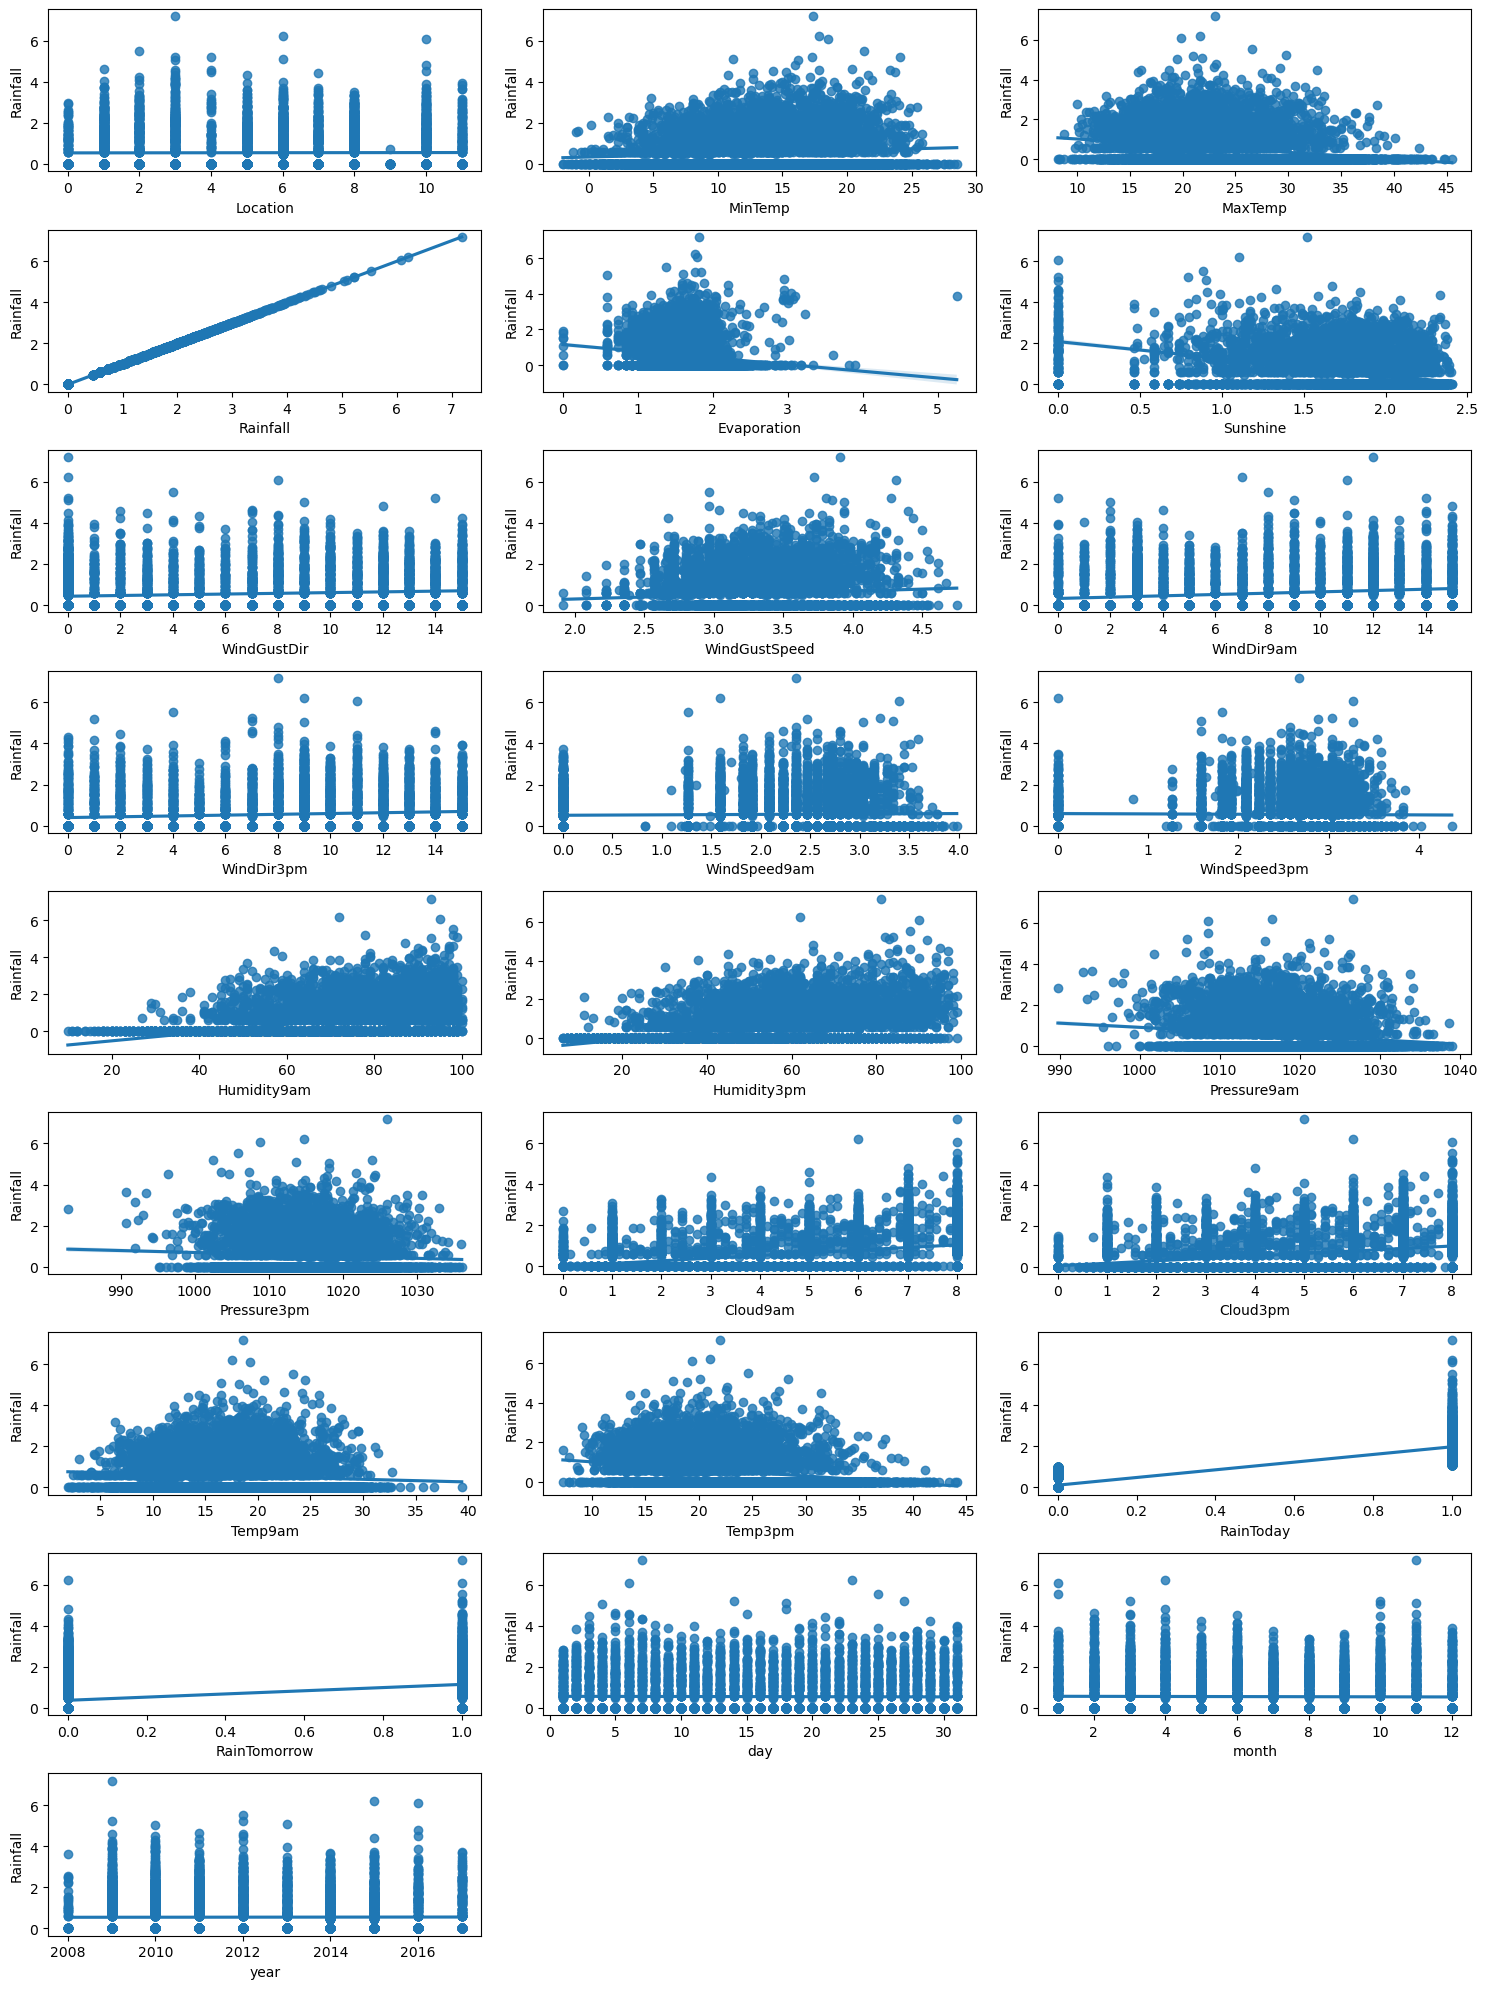

In [166]:
plt.figure(figsize=(15,20),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=25:
        ax=plt.subplot(9,3,plotnum)
        sns.regplot(x=i,y='Rainfall',data= df )
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

In [15]:
# Plotting boxplot

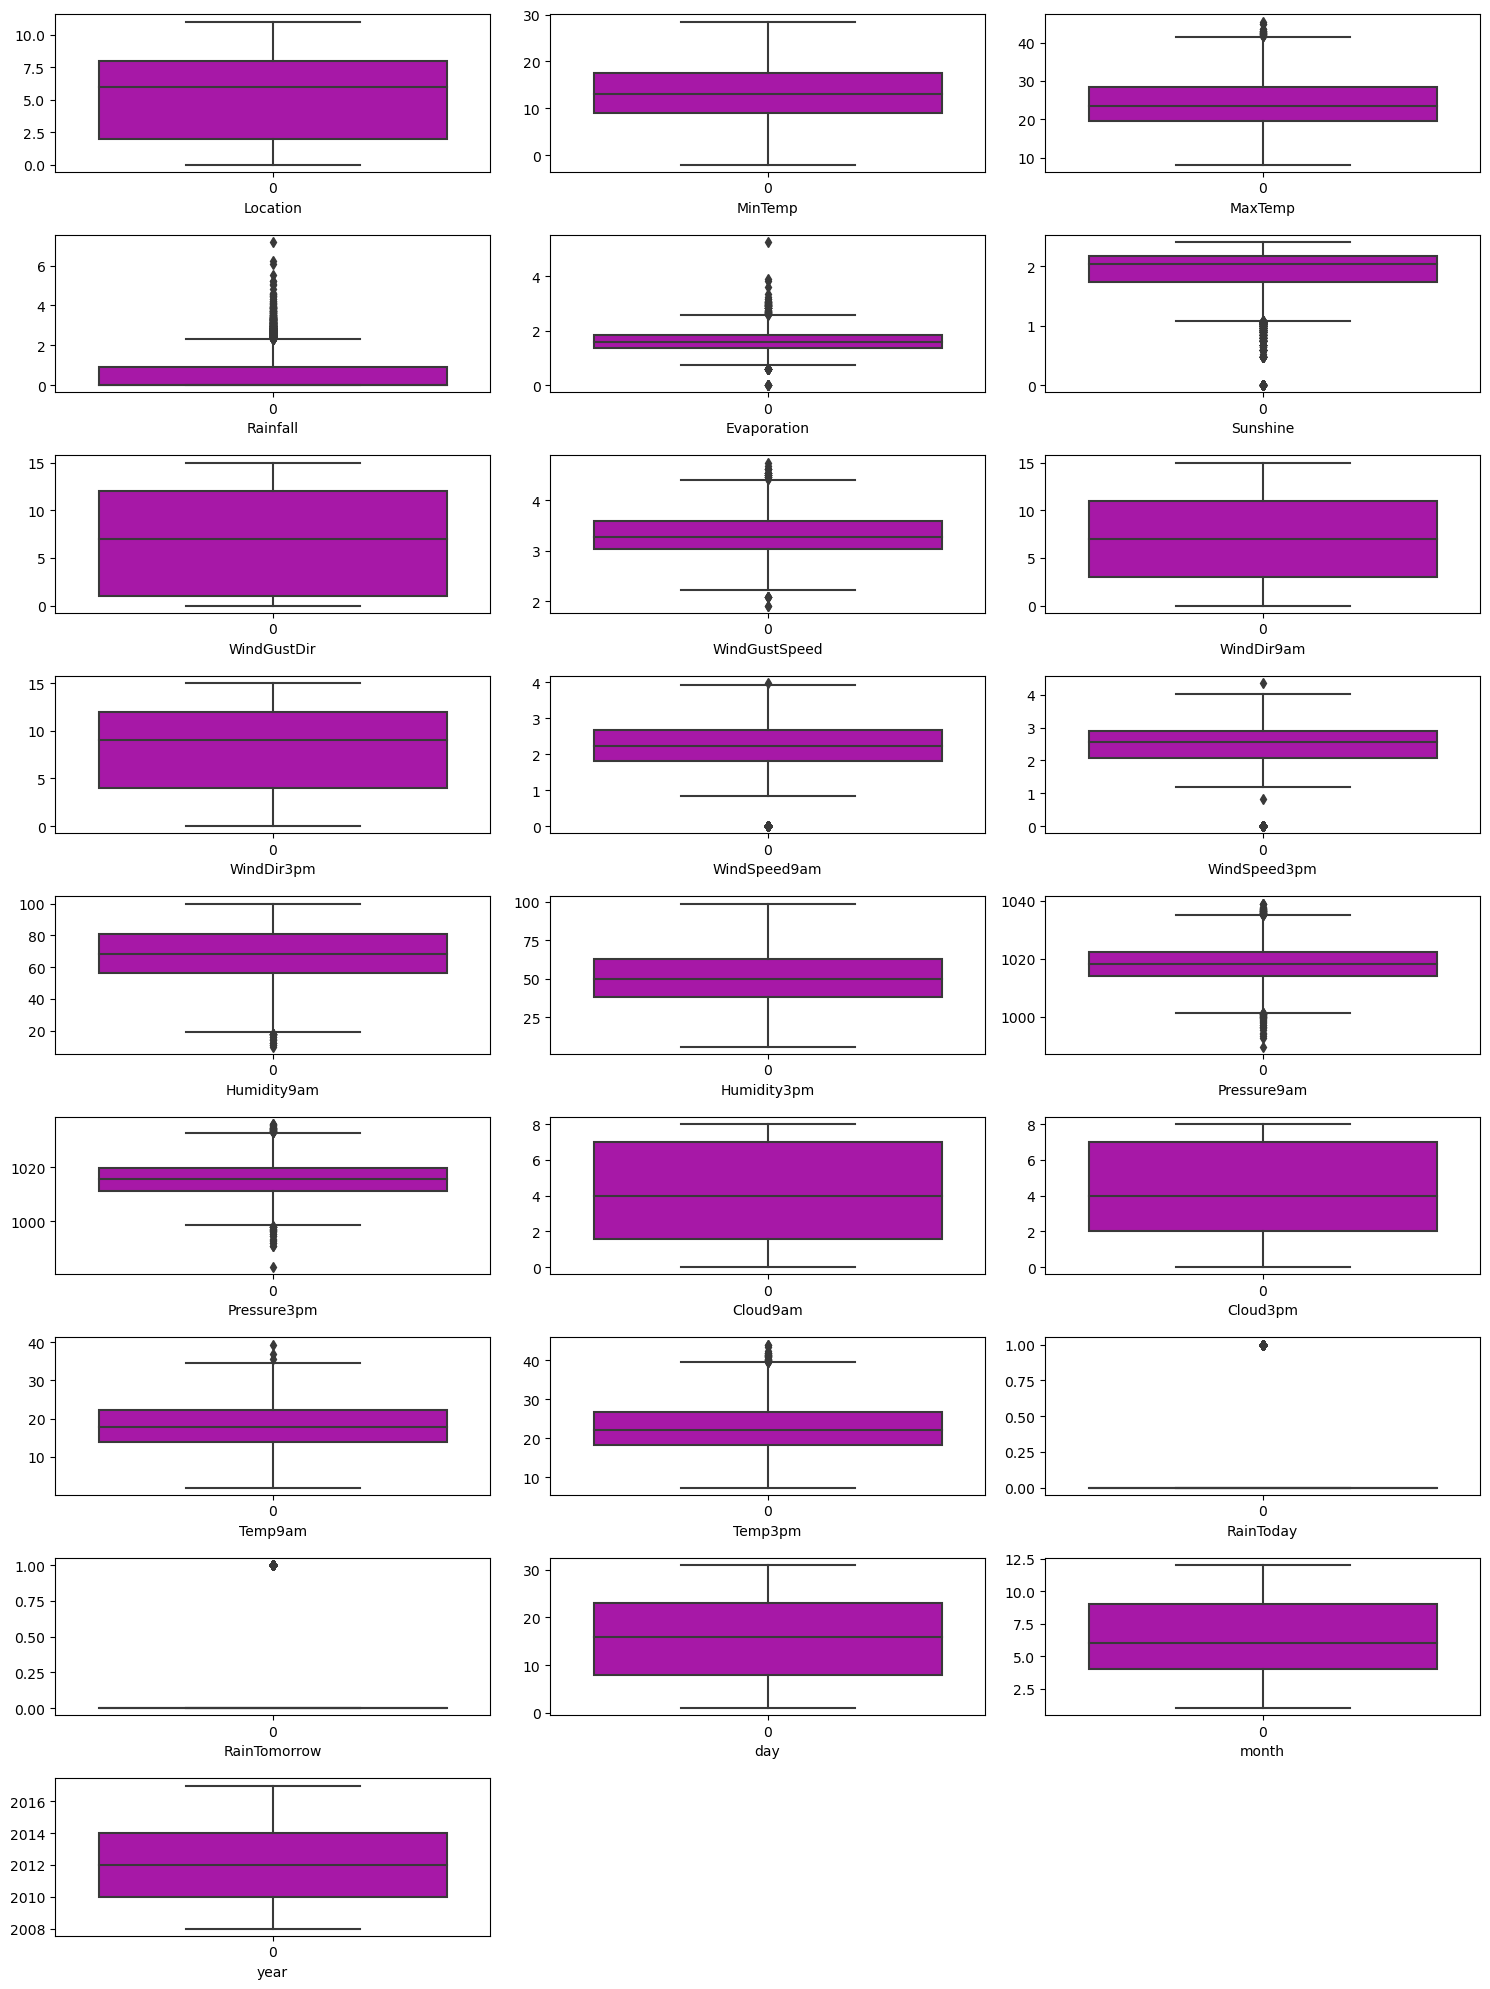

In [167]:
plt.figure(figsize=(15,20),facecolor='white')
p=1
for i in df.columns:
    if p<=25:
        ax=plt.subplot(9,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

So sunshine,evaporation,windgustspeed and rainfall column has most number of outliers present

In [16]:
# Removing outliers by zscore method

In [168]:
from scipy.stats import zscore

In [169]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [170]:
a=['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year']

In [171]:
curr=df[a]

In [172]:
z=np.abs(zscore(curr))

In [173]:
print(np.where(z>3))

(array([  12,   12,   43,   43,   51,   59,   59,   60,   60,   61,   61,
         66,   67,   67,   74,  122,  181,  186,  189,  195,  198,  225,
        289,  294,  359,  379,  403,  404,  405,  455,  515,  560,  560,
        572,  573,  580,  585,  674,  674,  690,  739,  739,  788,  844,
        870,  919,  931,  968,  969,  970,  970,  971,  997,  998, 1000,
       1092, 1105, 1128, 1138, 1140, 1141, 1192, 1254, 1255, 1346, 1347,
       1376, 1377, 1380, 1402, 1455, 1455, 1456, 1469, 1470, 1476, 1503,
       1508, 1509, 1510, 1511, 1515, 1520, 1522, 1526, 1527, 1528, 1529,
       1529, 1531, 1535, 1536, 1537, 1539, 1541, 1544, 1547, 1548, 1554,
       1556, 1557, 1558, 1559, 1571, 1586, 1587, 1596, 1600, 1607, 1664,
       1715, 1759, 1760, 1773, 1794, 1795, 1796, 1797, 1798, 1799, 1800,
       1806, 1811, 1822, 1823, 1824, 1825, 1827, 1835, 1836, 1837, 1839,
       1841, 1844, 1850, 1851, 1852, 1861, 1862, 1864, 1868, 1869, 1870,
       1871, 1874, 1877, 1878, 1879, 1880, 1881, 1

In [174]:
df_new=df[(z<3).all(axis=1)]

In [175]:
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1.0,13.4,22.900000,0.843433,1.598660,1.981981,13.0,3.530348,13.0,14.0,...,1007.1,8.000000,3.571429,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,0.000000,1.793747,2.170726,14.0,3.530348,6.0,15.0,...,1007.8,1.714286,3.000000,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,0.000000,1.842717,2.195702,15.0,3.583048,13.0,15.0,...,1008.7,2.714286,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,0.000000,1.722906,2.162611,4.0,2.884499,9.0,0.0,...,1012.8,0.571429,1.714286,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.000000,1.883863,2.002378,13.0,3.448217,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9.0,2.8,23.400000,0.000000,1.265892,2.113657,0.0,3.141381,9.0,1.0,...,1020.3,2.857143,1.714286,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6620,9.0,3.6,25.300000,0.000000,1.473613,2.102944,6.0,2.802039,9.0,3.0,...,1019.1,1.000000,0.571429,10.9,24.5,0.0,0.0,22.0,6.0,2017.0
6621,9.0,5.4,26.900000,0.000000,1.568274,2.138935,3.0,3.332222,9.0,14.0,...,1016.8,2.428571,2.571429,12.5,26.1,0.0,0.0,23.0,6.0,2017.0
6622,9.0,7.8,27.000000,0.000000,1.548668,2.145162,9.0,3.036589,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24.0,6.0,2017.0


After removing all the outliers now we have 6185 rows left

In [176]:
df=df_new

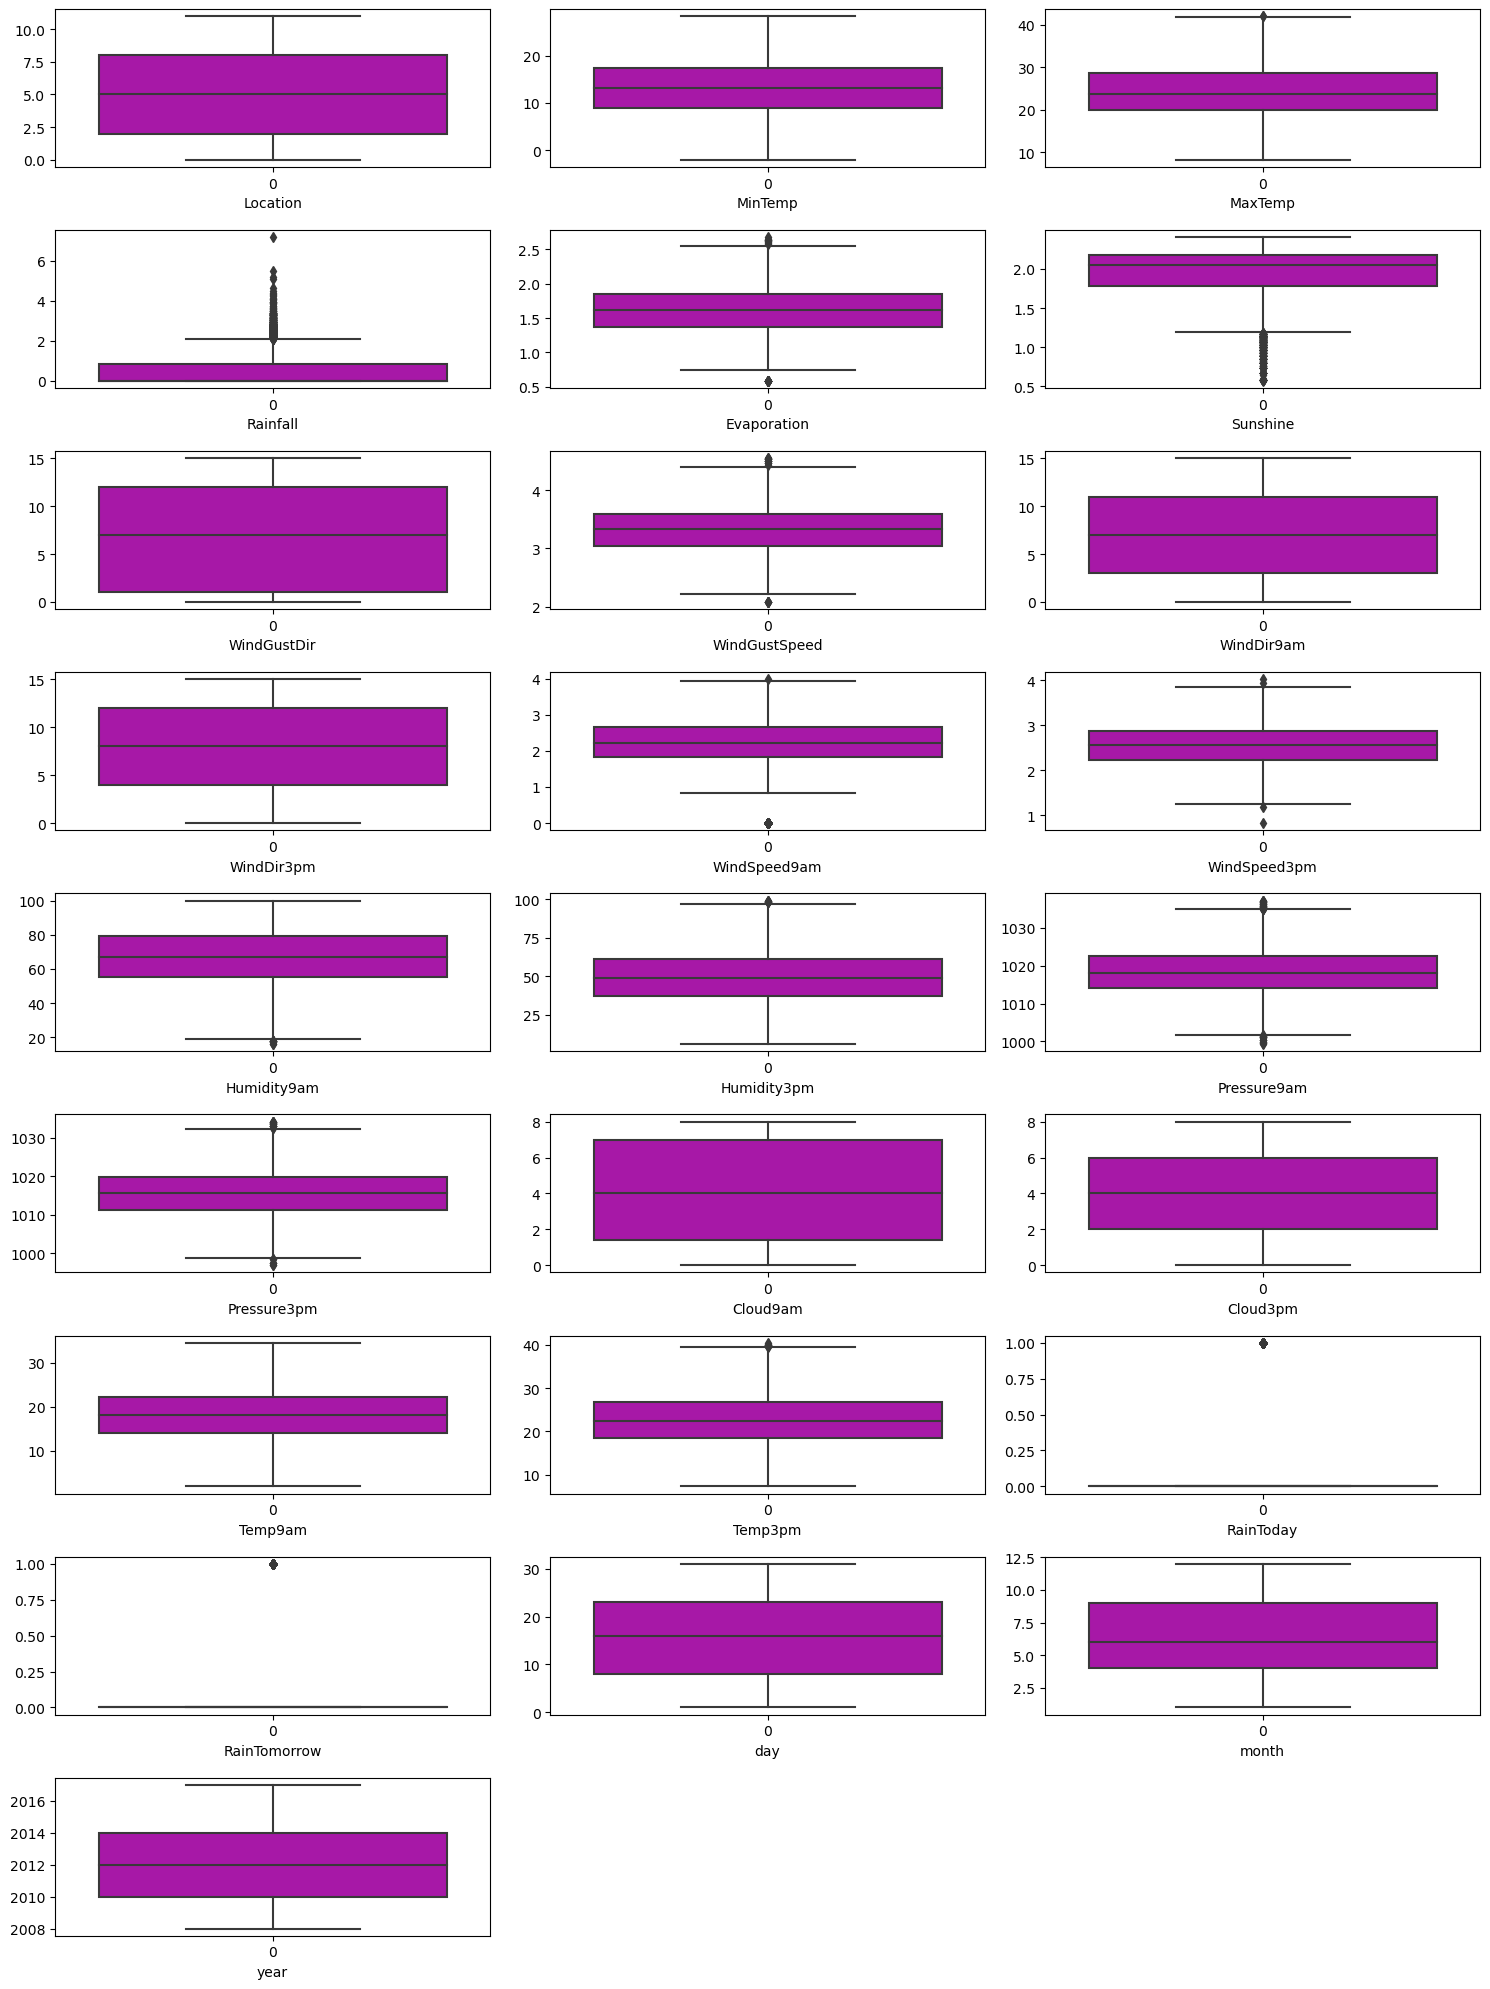

In [177]:
plt.figure(figsize=(15,20),facecolor='white')
p=1
for i in df.columns:
    if p<=25:
        ax=plt.subplot(9,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

In [17]:
# Checking correlation 

In [178]:
corr=df.corr()

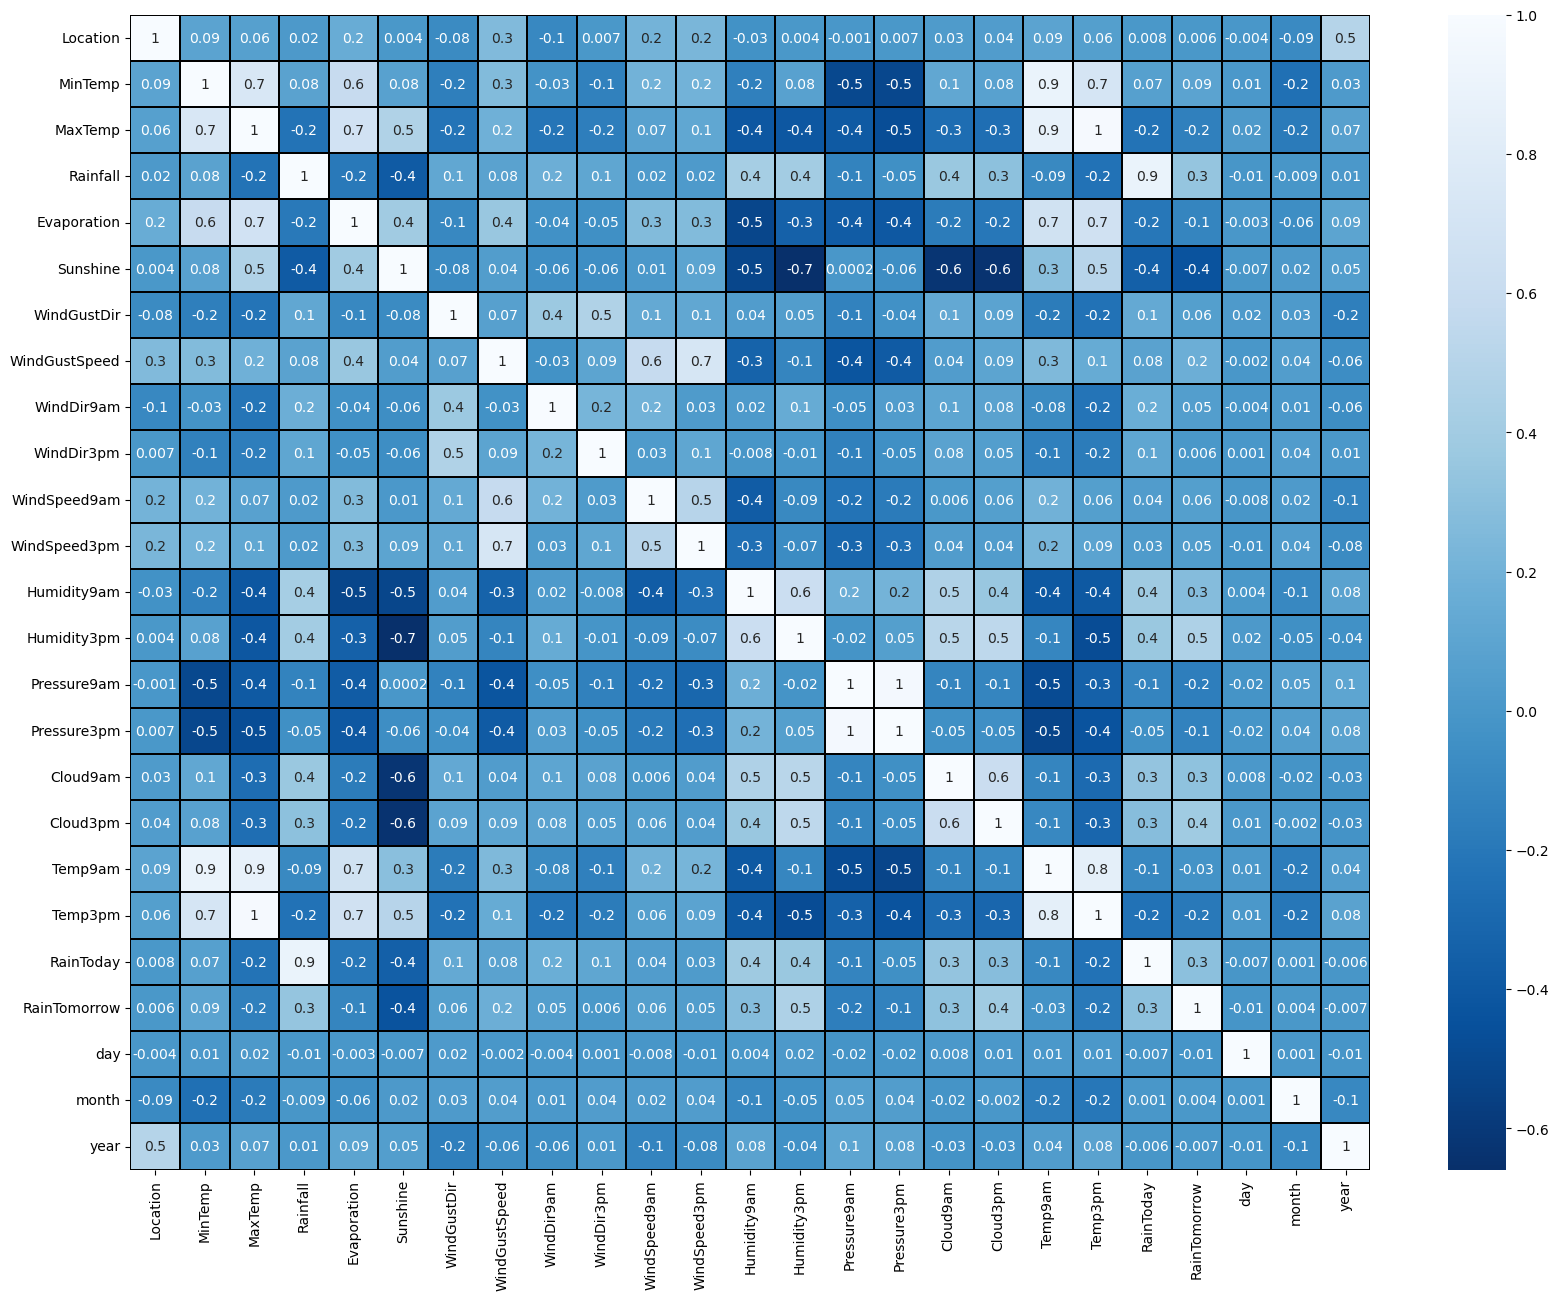

In [179]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [182]:
corr['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.889869
Humidity9am      0.419254
Humidity3pm      0.398828
Cloud9am         0.363646
RainTomorrow     0.342040
Cloud3pm         0.310300
WindDir9am       0.174683
WindGustDir      0.122209
WindDir3pm       0.111413
MinTemp          0.084105
WindGustSpeed    0.082502
WindSpeed9am     0.022969
WindSpeed3pm     0.021904
Location         0.015072
year             0.010764
month           -0.009277
day             -0.010983
Pressure3pm     -0.049870
Temp9am         -0.090325
Pressure9am     -0.133884
Evaporation     -0.194839
MaxTemp         -0.225096
Temp3pm         -0.235486
Sunshine        -0.385443
Name: Rainfall, dtype: float64

basically we can see RainToday, Humidity9a, Humidity3,8 Cloud,46 RainTomo and 040 Cloucolumns has good relation with the rainfall column.

In [183]:
df['RainTomorrow'].value_counts()

RainTomorrow
0.0    4847
1.0    1338
Name: count, dtype: int64

RainTomorrow
0.0    4847
1.0    1338
Name: count, dtype: int64

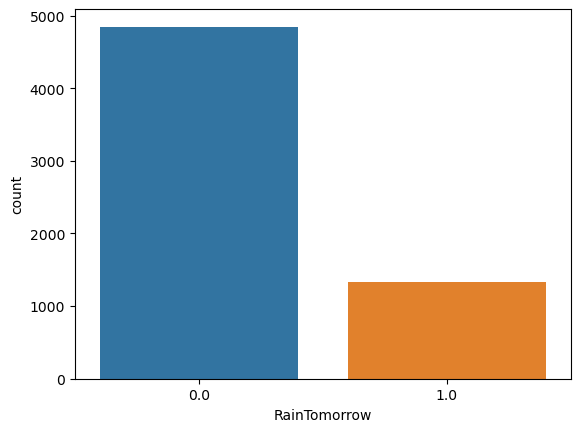

In [184]:
#visualize the no of RainTomorrow 
ax = sns.countplot(x='RainTomorrow',data = df)
df['RainTomorrow'].value_counts()

RainToday
0.0    4793
1.0    1392
Name: count, dtype: int64

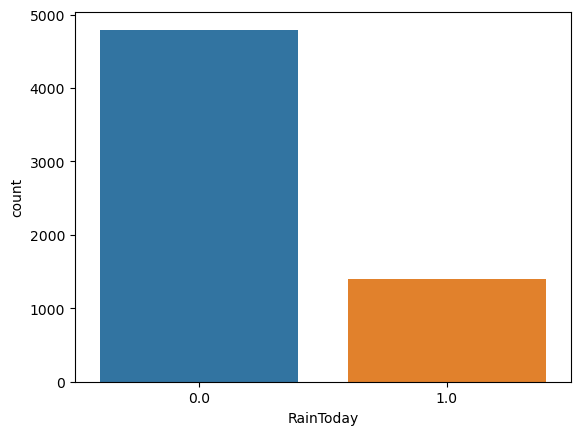

In [185]:
#visualize the no of RainToday 
ax = sns.countplot(x='RainToday',data = df)
df['RainToday'].value_counts()

Location
8.0     1170
1.0      862
5.0      683
6.0      655
3.0      580
2.0      537
10.0     530
7.0      464
4.0      247
11.0     227
0.0      191
9.0       39
Name: count, dtype: int64

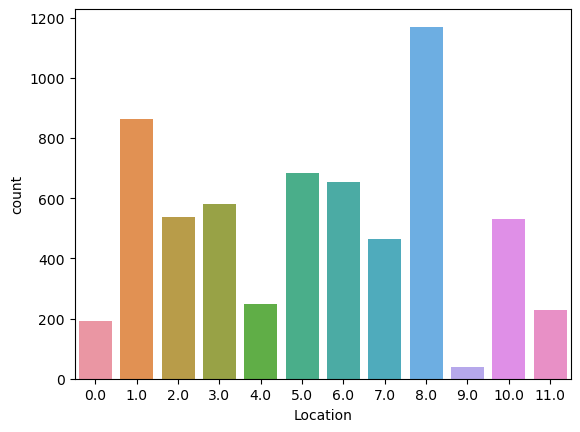

In [186]:
#visualize the no of Location 
ax = sns.countplot(x='Location',data = df)
df['Location'].value_counts()

{'Adelaide': 0, 'Albury': 1, 'Brisbane': 2, 'CoffsHarbour': 3, 'Darwin': 4, 'Melbourne': 5, 'Newcastle': 6, 'Penrith': 7, 'PerthAirport': 8, 'Uluru': 9, 'Williamtown': 10, 'Wollongong': 11}

In [187]:
from sklearn.preprocessing import OrdinalEncoder
classes = [['Melbourne'], ['Williamtown'], ['PerthAirport'], ['Albury'], ['Newcastle'], ['CoffsHarbour'],['Brisbane'],['Penrith'],['Wollongong'],['Darwin'],['Adelaide'],['Uluru']]
OE = OrdinalEncoder()
OE.fit(classes)
dict_value = {OE.categories_[0][i]: i for i in range(len(OE.categories_[0]))}

print(dict_value)

{'Adelaide': 0, 'Albury': 1, 'Brisbane': 2, 'CoffsHarbour': 3, 'Darwin': 4, 'Melbourne': 5, 'Newcastle': 6, 'Penrith': 7, 'PerthAirport': 8, 'Uluru': 9, 'Williamtown': 10, 'Wollongong': 11}


In [18]:
# separating x and y

In [188]:
x=df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

In [189]:
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1.0,13.4,22.900000,1.598660,1.981981,13.0,3.530348,13.0,14.0,2.714418,...,1007.1,8.000000,3.571429,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,1.793747,2.170726,14.0,3.530348,6.0,15.0,1.587401,...,1007.8,1.714286,3.000000,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,1.842717,2.195702,15.0,3.583048,13.0,15.0,2.668402,...,1008.7,2.714286,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,1.722906,2.162611,4.0,2.884499,9.0,0.0,2.223980,...,1012.8,0.571429,1.714286,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.883863,2.002378,13.0,3.448217,1.0,7.0,1.912931,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9.0,2.8,23.400000,1.265892,2.113657,0.0,3.141381,9.0,1.0,2.351335,...,1020.3,2.857143,1.714286,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6620,9.0,3.6,25.300000,1.473613,2.102944,6.0,2.802039,9.0,3.0,2.351335,...,1019.1,1.000000,0.571429,10.9,24.5,0.0,0.0,22.0,6.0,2017.0
6621,9.0,5.4,26.900000,1.568274,2.138935,3.0,3.332222,9.0,14.0,2.080084,...,1016.8,2.428571,2.571429,12.5,26.1,0.0,0.0,23.0,6.0,2017.0
6622,9.0,7.8,27.000000,1.548668,2.145162,9.0,3.036589,10.0,3.0,2.351335,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24.0,6.0,2017.0


In [190]:
y

0       0.843433
1       0.000000
2       0.000000
3       0.000000
4       1.000000
          ...   
6619    0.000000
6620    0.000000
6621    0.000000
6622    0.000000
6623    0.000000
Name: Rainfall, Length: 6185, dtype: float64

In [191]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,-1.373990,0.064792,-0.218058,-0.060383,0.141192,1.208276,0.528283,1.300660,1.360008,0.743797,...,-1.377797,1.514127,-0.194269,-0.184016,-0.172121,-0.53891,-0.525402,-1.677505,1.644913,-1.745619
1,-1.373990,-1.011744,0.145902,0.536991,0.675693,1.400290,0.528283,-0.233478,1.579835,-0.575867,...,-1.262922,-0.872230,-0.427151,-0.131413,0.251725,-0.53891,-0.525402,-1.563675,1.644913,-1.745619
2,-1.373990,-0.024919,0.245164,0.686943,0.746422,1.592304,0.658841,1.300660,1.579835,0.689915,...,-1.115225,-0.492582,-0.834694,0.534894,0.065233,-0.53891,-0.525402,-1.449845,1.644913,-1.745619
3,-1.373990,-0.688783,0.625668,0.320072,0.652713,-0.519850,-1.071746,0.424010,-1.717559,0.169526,...,-0.442385,-1.306113,-0.951134,0.026397,0.624709,-0.53891,-0.525402,-1.336015,1.644913,-1.745619
4,-1.373990,0.800425,1.337044,0.812935,0.198954,1.208276,0.324811,-1.329291,-0.178775,-0.194692,...,-1.558316,1.134480,1.610564,-0.026206,1.167232,-0.53891,-0.525402,-1.222185,1.644913,-1.745619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,1.183762,-1.837088,-0.135339,-1.079346,0.514081,-1.287907,-0.435347,0.424010,-1.497733,0.318650,...,0.788421,-0.438346,-0.951134,-1.376355,-0.070398,-0.53891,-0.525402,0.599093,-0.134188,2.181230
6181,1.183762,-1.693550,0.178990,-0.443288,0.483743,-0.135822,-1.276032,0.424010,-1.058081,0.318650,...,0.591492,-1.143406,-1.416898,-1.236079,0.285633,-0.53891,-0.525402,0.712923,-0.134188,2.181230
6182,1.183762,-1.370589,0.443688,-0.153427,0.585664,-0.711865,0.037444,0.424010,1.360008,0.001033,...,0.214045,-0.601053,-0.601812,-0.955529,0.556894,-0.53891,-0.525402,0.826753,-0.134188,2.181230
6183,1.183762,-0.939975,0.460231,-0.213460,0.603298,0.440220,-0.694958,0.643172,-1.058081,0.318650,...,0.164813,-0.384111,-0.834694,-0.499635,0.539940,-0.53891,-0.525402,0.940583,-0.134188,2.181230


In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Location,1.614276
1,MinTemp,9.337583
2,MaxTemp,33.214654
3,Evaporation,2.589510
4,Sunshine,2.984293
5,WindGustDir,1.575390
6,WindGustSpeed,3.274967
7,WindDir9am,1.412918
8,WindDir3pm,1.457206
9,WindSpeed9am,1.957446


In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Location,1.614276
1,MinTemp,9.337583
2,MaxTemp,33.214654
3,Evaporation,2.589510
4,Sunshine,2.984293
5,WindGustDir,1.575390
6,WindGustSpeed,3.274967
7,WindDir9am,1.412918
8,WindDir3pm,1.457206
9,WindSpeed9am,1.957446


In [19]:
# Importing some basic metrices 

In [194]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [20]:
# checking the best random_state value

In [195]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestRegressor(n_jobs=-1)
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i

print('max accuracy is :',maxacc,'random state :',maxrs)  

max accuracy is : 0.836700113896025 random state : 177


In [21]:
# separating our train and test dataset based on the best random_state values

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxrs)

In [197]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [198]:
from sklearn.model_selection import cross_val_score

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Importing SequentialFeatureSelector for feature selection purpose

In [200]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [201]:
RFR = RandomForestRegressor()
sfs = SFS(RFR, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(1, 24),
                          scoring='r2')

In [23]:
# checking the indexes for the new columns

In [202]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 7, 9, 11, 12, 13, 14, 17, 19, 20, 22, 23)

In [24]:
# checking the new best columns 

In [203]:
selected_columns = sfs.k_feature_names_
print("Selected features: ",selected_columns)

Selected features:  ('Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindDir9am', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'RainToday', 'RainTomorrow', 'month', 'year')


In [25]:
# transforming our dataset for the best columns 

In [204]:
x_train_2 = sfs.transform(x_train1)
x_test_2 = sfs.transform(x_test1)

model = RandomForestRegressor()

print("training",np.mean(cross_val_score(model, x_train_2, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_2, y_test, cv=5, scoring='r2')))

training 0.8057369106993496
testing 0.813714772713529


So here we cachieved less accuracies

In [205]:
x_train_2

array([[ 0.22460453, -0.00697674,  1.4528493 , ..., -0.52540179,
         1.0518792 ,  0.87228042],
       [-1.37399044,  0.54923359,  0.39405677, ...,  1.90330528,
         1.64491259, -0.87298586],
       [-0.73455245, -1.22705102, -0.54893032, ..., -0.52540179,
         0.7553625 , -0.87298586],
       ...,
       [ 0.54432352,  1.24898207, -0.58201759, ...,  1.90330528,
        -1.61677107,  1.30859699],
       [-1.37399044, -2.3932985 , -1.98822641, ..., -0.52540179,
         0.16232911, -1.30930243],
       [ 1.50348051,  1.03367485,  0.07972774, ..., -0.52540179,
         1.64491259,  1.30859699]])

In [26]:
# Converting into dataframe

In [206]:
x_train_sfs = pd.DataFrame(x_train_2,columns=selected_columns)
x_test_sfs= pd.DataFrame(x_test_2,columns=selected_columns)

In [207]:
x_train_sfs

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindDir9am,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,RainToday,RainTomorrow,month,year
0,0.224605,-0.006977,1.452849,1.276021,0.967809,-0.014316,-0.575867,-0.937456,-0.310030,-0.530893,-0.566638,1.025857,-0.538910,-0.525402,1.051879,0.872280
1,-1.373990,0.549234,0.394057,0.300349,-1.886681,-1.110129,0.001033,0.187626,2.261085,-0.505474,-0.360331,0.587498,-0.538910,1.903305,1.644913,-0.872986
2,-0.734552,-1.227051,-0.548930,-0.094857,0.547101,-0.014316,0.001033,-1.529605,-0.310030,0.028337,-0.229045,-0.078809,-0.538910,-0.525402,0.755363,-0.872986
3,-1.054271,0.854252,0.576037,1.506778,0.547101,0.204847,-0.575867,-0.167663,0.137121,0.206274,0.197634,1.236270,-0.538910,-0.525402,-1.616771,-0.000353
4,0.864043,1.428405,2.230400,2.494077,0.669964,-0.671803,0.169526,-2.536257,-2.098631,-1.314278,-1.164458,2.165593,-0.538910,-0.525402,1.644913,0.435964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,0.864043,-0.437591,0.195533,0.280478,0.788099,-0.671803,0.846396,-1.529605,-1.427906,1.079782,0.788421,-0.201550,-0.538910,-0.525402,0.755363,-0.000353
4944,-0.734552,-1.173224,-0.681279,-0.094857,0.729594,-0.014316,0.169526,-1.292745,-0.254136,-0.537826,-0.639314,-0.113878,-0.538910,-0.525402,0.458846,-0.872986
4945,0.544324,1.248982,-0.582018,-0.287569,-1.171910,0.862335,0.169526,0.128411,1.702147,-0.064098,0.110892,0.464757,-0.538910,1.903305,-1.616771,1.308597
4946,-1.373990,-2.393298,-1.988226,-1.250586,-0.694539,-0.890966,-2.434611,1.667998,0.640165,1.403303,1.182279,-2.708969,-0.538910,-0.525402,0.162329,-1.309302


Now we have 16 columns

In [27]:
# Importing almost all the regression algorithmns

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [28]:
# making their instances 

In [209]:
LR=LinearRegression()
RD=Ridge()
LS=Lasso()
EN=ElasticNet()
svr=SVR()
DTR = DecisionTreeRegressor()
GB=GradientBoostingRegressor()
RFR=RandomForestRegressor()
ETR=ExtraTreesRegressor()

In [210]:
loop=[LR,RD,LS,EN,svr,DTR,GB,RFR,ETR]

In [29]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [220]:
for i in loop:
    i.fit(x_train_sfs,y_train)
    pred=i.predict(x_test_sfs)
    print('This is for :',i)
    print('r2_score will be :',r2_score(y_test,pred))
    print('mean abs error will be :',mean_absolute_error(y_test,pred))
    print('mean squared error will be :',mean_squared_error(y_test,pred))
    print('root mean squared error will be :',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    score=cross_val_score(i,x_train_sfs,y_train,cv=5,scoring='r2')
    print(score)
    print('mean CV :',score.mean())
    print("difference between mean CV and r2_score will be :",r2_score(y_test,pred)-score.mean())
    print('\n')

This is for : LinearRegression()
r2_score will be : 0.8222679438825288
mean abs error will be : 0.24258747776349784
mean squared error will be : 0.13661830045992307
root mean squared error will be : 0.36961912891505366


[0.80607934 0.81966825 0.79153692 0.78788979 0.80674032]
mean CV : 0.802382922450063
difference between mean CV and r2_score will be : 0.019885021432465733


This is for : Ridge()
r2_score will be : 0.8222630435173186
mean abs error will be : 0.24260637638531898
mean squared error will be : 0.13662206725124523
root mean squared error will be : 0.36962422438369114


[0.80609765 0.8196538  0.79153711 0.78790297 0.80673298]
mean CV : 0.8023849033342072
difference between mean CV and r2_score will be : 0.019878140183111404


This is for : Lasso()
r2_score will be : -0.0013890011107471345
mean abs error will be : 0.6993837020964112
mean squared error will be : 0.769743322727261
root mean squared error will be : 0.8773501710988953


[-0.00347903 -0.00226282 -0.00030497 -0.00

So here we can see that extratrees regressor is performing good because r2_score is 0.8351 and the mean abs and mean squared error is very less,
And for the cv score it is approx 80% and the difference between cv and r2_score is very less thats mean there are very less overfitting.

In [31]:
# setting the best parameters for ExtraTreesRegressor, to feed this into RCV

In [221]:
parameters = {
    'n_estimators': [50,100,150,200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None,2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    'max_features': ['auto','sqrt','log2',None],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
    'n_jobs':[-1]
}

In [30]:
# Importing RandomizedSearchCV because it will take very less time than Grid SearchCv

In [222]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [223]:
RCV.fit(x_train_sfs,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 2, 8, 16, 32, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 150, 200],
                                        'n_jobs': [-1],
                                        'warm_start': [True, False]})

In [32]:
# Best parameters

In [224]:
RCV.best_params_

{'warm_start': False,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'squared_error',
 'bootstrap': True}

In [33]:
# Now use these best parameters to train our model. and this model is going to be our final model 

In [225]:
final_model=ExtraTreesRegressor(n_estimators=200,min_samples_split=4,min_samples_leaf=1,max_depth=None,bootstrap=True,max_features='log2',criterion='squared_error',warm_start=False,n_jobs=-1)
final_model.fit(x_train_sfs,y_train)
pred=final_model.predict(x_test_sfs)
acc= r2_score(y_test,pred)
print(acc*100)

83.61605925768187


So our final r2_score will be 95.66%

In [228]:
# Lets save our model
import joblib
filename = 'rain_weather_forecasting_regression.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [34]:
# Lets test our model

In [230]:
t=np.array([0.224605,	-0.006977,	1.452849,	1.276021,	0.967809,	-0.014316,	-0.575867,	-0.937456,	-0.310030,	-0.530893,	-0.566638,	1.025857,	-0.538910,	-0.525402,	1.051879,	0.872280]).reshape(1,-1)
final_model.predict(t)   #0

array([0.0093988])

In [231]:
t=np.array([1.503481,	1.033675,	0.079728,	0.136950,	0.188846,	0.424010,	0.689915,	-0.463737,	0.584271,	0.173922,	0.410974,	0.850514,	1.855599,	-0.525402,	1.644913,	1.308597]).reshape(1,-1)
final_model.predict(t)          #1.9660

array([1.86993227])

In [226]:
x_train_sfs

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindDir9am,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,RainToday,RainTomorrow,month,year
0,0.224605,-0.006977,1.452849,1.276021,0.967809,-0.014316,-0.575867,-0.937456,-0.310030,-0.530893,-0.566638,1.025857,-0.538910,-0.525402,1.051879,0.872280
1,-1.373990,0.549234,0.394057,0.300349,-1.886681,-1.110129,0.001033,0.187626,2.261085,-0.505474,-0.360331,0.587498,-0.538910,1.903305,1.644913,-0.872986
2,-0.734552,-1.227051,-0.548930,-0.094857,0.547101,-0.014316,0.001033,-1.529605,-0.310030,0.028337,-0.229045,-0.078809,-0.538910,-0.525402,0.755363,-0.872986
3,-1.054271,0.854252,0.576037,1.506778,0.547101,0.204847,-0.575867,-0.167663,0.137121,0.206274,0.197634,1.236270,-0.538910,-0.525402,-1.616771,-0.000353
4,0.864043,1.428405,2.230400,2.494077,0.669964,-0.671803,0.169526,-2.536257,-2.098631,-1.314278,-1.164458,2.165593,-0.538910,-0.525402,1.644913,0.435964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,0.864043,-0.437591,0.195533,0.280478,0.788099,-0.671803,0.846396,-1.529605,-1.427906,1.079782,0.788421,-0.201550,-0.538910,-0.525402,0.755363,-0.000353
4944,-0.734552,-1.173224,-0.681279,-0.094857,0.729594,-0.014316,0.169526,-1.292745,-0.254136,-0.537826,-0.639314,-0.113878,-0.538910,-0.525402,0.458846,-0.872986
4945,0.544324,1.248982,-0.582018,-0.287569,-1.171910,0.862335,0.169526,0.128411,1.702147,-0.064098,0.110892,0.464757,-0.538910,1.903305,-1.616771,1.308597
4946,-1.373990,-2.393298,-1.988226,-1.250586,-0.694539,-0.890966,-2.434611,1.667998,0.640165,1.403303,1.182279,-2.708969,-0.538910,-0.525402,0.162329,-1.309302


In [227]:
y_train

2010    0.000000
722     0.843433
1454    0.000000
4671    0.000000
6156    0.000000
          ...   
5751    0.000000
1421    0.000000
2565    0.000000
235     0.000000
2853    1.966095
Name: Rainfall, Length: 4948, dtype: float64